In [1]:
import kagglehub
from time import time
import numpy as np  
import kagglehub
import faiss

In [30]:
import pickle
with open('kmeans.pkl','rb') as pkl:
    Vecs=pickle.load(pkl)
Vecs.shape
Vecs=Vecs/np.linalg.norm(Vecs,axis=1,keepdims=True)
np.linalg.norm(Vecs,axis=1)

array([1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 0.99999994,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       0.99999994, 0.99999994, 1.        , 0.99999994, 0.99999994,
       1.        , 1.        , 0.99999994, 0.99999994, 0.99999994,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.0000001 , 1.0000001 , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.     

In [2]:
d = 300  # Dimensionality
n = 1000  # Number of points per update

In [3]:
class reader():
    def __init__(self,path):
        self.file=open(path,'r')
        self.counter=0
    
    def read_block(self,n):
        L=[]; word=[]
        for j in range(n):
            line=self.file.readline()
            if line=='': break
            T=line.split()
            word.append(T[0])
            vec=(np.array([float(x) for x in T[1:]]))
            L.append(vec)
            self.counter+=1
            print(self.counter,end='\r')
        word=np.array(word)
        Vecs=np.stack(L)
        X = Vecs.astype('float32')
        return word,X

In [4]:
path = kagglehub.dataset_download("thanakomsn/glove6b300dtxt")
glove_path = path + "/glove.6B.300d.txt" 
#glove_path = "shuffled_output.txt"
_reader=reader(glove_path)

In [20]:
%%time
#centroid_words,centroid_points = _reader.read_block(10000)
centroid_points=Vecs
# Normalize the vectors to unit length (this converts cosine distance to L2 distance)
faiss.normalize_L2(centroid_points)

# Create the FAISS index (L2 distance)
index = faiss.IndexFlatL2(d)

# Add normalized points to the index
index.add(centroid_points)

CPU times: user 1.75 ms, sys: 1.66 ms, total: 3.41 ms
Wall time: 1.98 ms


In [21]:
%%time
query_words, query_points = _reader.read_block(10000)
# Query for the nearest neighbor to a set of points
faiss.normalize_L2(query_points)  # Normalize the query point
distances, indices = index.search(query_points, k=1000)

CPU times: user 5.03 s, sys: 547 ms, total: 5.58 s
Wall time: 1.07 s


In [22]:
indices.shape, distances.shape

((10000, 1000), (10000, 1000))

In [13]:
np.max(indices)

9999

In [14]:
for j in range(0,10):
    print(j,'query ',query_words[j],' nearest ',centroid_words[indices[j,0]])

0 query  baths  nearest  bath
1 query  lends  nearest  lend
2 query  crease  nearest  puck
3 query  microsystems  nearest  oracle
4 query  dampened  nearest  boosted
5 query  flanker  nearest  winger
6 query  sensory  nearest  visual
7 query  pep  nearest  rallies
8 query  beefed  nearest  patrols
9 query  fuhrman  nearest  simpson


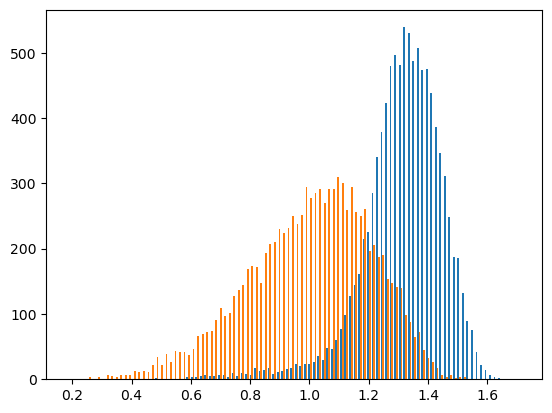

In [15]:
from matplotlib.pylab import *
hist([distances[:,10],distances[:,0]],bins=100);

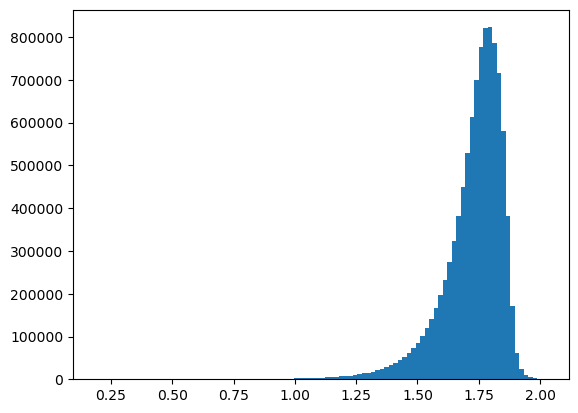

In [16]:
hist(distances.flatten(),bins=100);

In [11]:
sqrt(2)

1.4142135623730951

In [12]:
indices

<function numpy.indices(dimensions, dtype=<class 'int'>, sparse=False)>

In [13]:
indices

<function numpy.indices(dimensions, dtype=<class 'int'>, sparse=False)>